MEDICAL COST ESTIMATION

CONTEXT

Dataset taken from Machine Learning with R by Brett Lantz, the objetive of this project is predict insurance medical cost (USD) based on six features (Age,sex,bmi,number of childrens,smoker and region) through different machine learning models for regression.

Source: https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/README.md

In [1]:
#Basic necessary libraries

#plot libs
from matplotlib import pyplot as plt
import seaborn as sns

#sklearn libs
from sklearn.model_selection import train_test_split

#pandas libs
import pandas as pd

#numpy libs
import numpy as np


DATA EXPLORATION

In [2]:
dataset= pd.read_csv("C:/Users/PERSONAL/OneDrive/Datascience/Regression_MLClassifier/insurance.csv")

In [101]:
print("Samples (Rows): %2d \nVariables (Columns): %2d" %dataset.shape)

Samples (Rows): 1338 
Variables (Columns):  7


In [4]:
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
#Check if there are Na Values
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The dataset contain 3 categorical variables, we gonna encoding this variables to apply ML models.

In [7]:
#Extracting categoricals columns and adding in a list
categoricals=[]
for idx in dataset.columns:
    if (dataset[idx].dtype) == object:    
        categoricals.append(idx)

In [8]:
print('Categorical features:',categoricals)

Categorical features: ['sex', 'smoker', 'region']


In [9]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(dataset[categoricals])
dataset[categoricals] = enc.transform(dataset[categoricals])

In [10]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


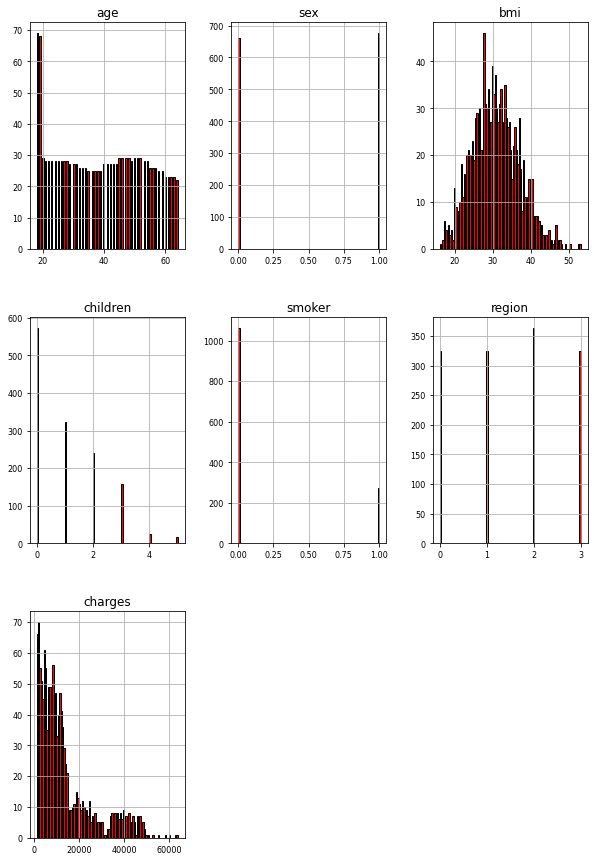

In [11]:
fig_ = dataset.hist(figsize=(10, 15), bins=100, color="red", edgecolor="black", xlabelsize=8, ylabelsize=8)

The columns of age, bmi and the objective variable charges present a greater distribution of values while the remaining characteristics have a more uniform distribution.
The atypical data are not very predominant in the data distribution, therefore later, for the normalization of the data, it will be done through MinMaxScaler.

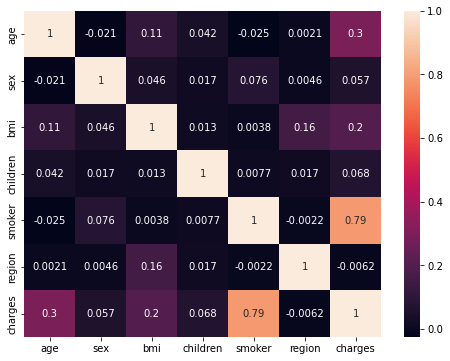

In [12]:
#Pearson correlation matrix
corr_df = dataset.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

According to the previous matrix; The variables that are most related to the cost of health insurance are whether the patient is a smoker, age and BMI, which makes sense because these conditions influence whether one is more or less prone to health problems.
Remaining variables doesnt have high relation with target variable.


In [13]:
dataset.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [14]:
dataset.drop(columns=['charges'])

,age,sex,bmi,children,smoker,region
0,19,0.0,27.900,0,1.0,3.0
1,18,1.0,33.770,1,0.0,2.0
2,28,1.0,33.000,3,0.0,2.0
3,33,1.0,22.705,0,0.0,1.0
4,32,1.0,28.880,0,0.0,1.0
...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0
1334,18,0.0,31.920,0,0.0,0.0
1335,18,0.0,36.850,0,0.0,2.0
1336,21,0.0,25.800,0,0.0,3.0


In [15]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


To train differents models lets normalize the data.

In [16]:
#Normalizing with MinMaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_scaled=pd.DataFrame(MinMaxScaler().fit_transform(dataset.drop(columns=['charges'])))
features_scaled.columns= list((dataset.drop(columns=['charges'])).columns)

In [17]:
features_scaled

,age,sex,bmi,children,smoker,region
0,0.021739,0.0,0.321227,0.0,1.0,1.000000
1,0.000000,1.0,0.479150,0.2,0.0,0.666667
2,0.217391,1.0,0.458434,0.6,0.0,0.666667
3,0.326087,1.0,0.181464,0.0,0.0,0.333333
4,0.304348,1.0,0.347592,0.0,0.0,0.333333
...,...,...,...,...,...,...
1333,0.695652,1.0,0.403820,0.6,0.0,0.333333
1334,0.000000,0.0,0.429379,0.0,0.0,0.000000
1335,0.000000,0.0,0.562012,0.0,0.0,0.666667
1336,0.065217,0.0,0.264730,0.0,0.0,1.000000


In [18]:
scaled_dataset=pd.concat([features_scaled, dataset['charges']], axis=1)

In [19]:
scaled_dataset

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,16884.92400
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,1725.55230
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,4449.46200
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,21984.47061
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,1.0,0.403820,0.6,0.0,0.333333,10600.54830
1334,0.000000,0.0,0.429379,0.0,0.0,0.000000,2205.98080
1335,0.000000,0.0,0.562012,0.0,0.0,0.666667,1629.83350
1336,0.065217,0.0,0.264730,0.0,0.0,1.000000,2007.94500


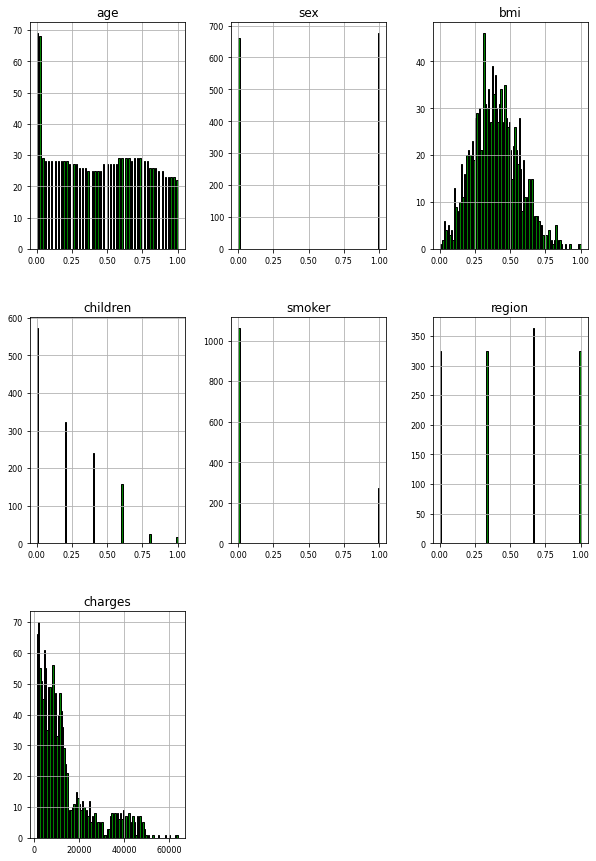

In [20]:
fig_ = scaled_dataset.hist(figsize=(10, 15), bins=100, color="green", edgecolor="black", xlabelsize=8, ylabelsize=8)

Normalize data doesnt change distribution.

In [21]:
X=scaled_dataset.drop(columns=['charges']).values
Y=scaled_dataset['charges'].values

In [22]:
from sklearn.model_selection import train_test_split
testsize=int(Y.shape[0]*(15)/100) #Test size samples= total samples*(percentage test data selected)/100
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=testsize,random_state=1)
print('Train samples: {}'.format(x_train.shape[0]))
print('Test samples: {}'.format(x_test.shape[0]))

Train samples: 1138
Test samples: 200


In [23]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error

In [24]:
#Dictionary to save regression metrics (key:[Mean Absolute error,R2 coefficient])
Models=['MLinearRegression','DecisionTreeRegressor','RandomForestRegressor','NeuralNetwork']
RegressionMetrics={key:[None,None] for key in Models}
MPredicts={key:None for key in Models}


MACHINE LEARNING MODELS

1)MULTILINEAR REGRESSION

LinearRegression(positive=True)
Mean absolute percentage error: 67.875
Coefficient of determination: 0.645


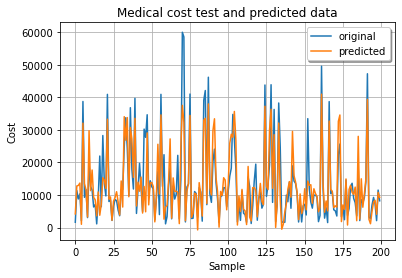

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(positive=True).fit(x_train, y_train)
print(reg)
y_pred=reg.predict(x_test)
MPredicts['MLinearRegression']=y_pred
RegressionMetrics['MLinearRegression'][0]=mean_absolute_percentage_error(y_pred, y_test)*100
RegressionMetrics['MLinearRegression'][1]=r2_score(y_pred, y_test)
print('Mean absolute percentage error: {:.3f}'.format(RegressionMetrics['MLinearRegression'][0]))
print('Coefficient of determination: {:.3f}'.format(RegressionMetrics['MLinearRegression'][1]))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Medical cost test and predicted data")
plt.xlabel('Sample')
plt.ylabel('Cost')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

2)DECISION TREE REGRESSOR

DecisionTreeRegressor(max_depth=18, min_samples_leaf=4, min_samples_split=5,
                      random_state=1)
Mean absolute percentage error: 33.912
Coefficient of determination: 0.814


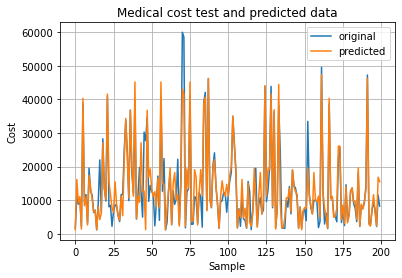

In [26]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree= DecisionTreeRegressor(random_state=1,criterion="squared_error",max_depth=18,min_samples_leaf=4,min_samples_split=5).fit(x_train,y_train)
print(DecisionTree)
y_pred=DecisionTree.predict(x_test)
MPredicts['DecisionTreeRegressor']=y_pred
RegressionMetrics['DecisionTreeRegressor'][0]=mean_absolute_percentage_error(y_pred, y_test)*100
RegressionMetrics['DecisionTreeRegressor'][1]=r2_score(y_pred, y_test)
print('Mean absolute percentage error: {:.3f}'.format(RegressionMetrics['DecisionTreeRegressor'][0]))
print('Coefficient of determination: {:.3f}'.format(RegressionMetrics['DecisionTreeRegressor'][1]))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Medical cost test and predicted data")
plt.xlabel('Sample')
plt.ylabel('Cost')
plt.legend(loc='best',fancybox=True, shadow=False)
plt.grid(True)
plt.show()   

3)RANDOM FOREST

RandomForestRegressor(max_depth=10, min_samples_leaf=4, n_estimators=30,
                      random_state=1)
Mean absolute percentage error: 28.778
Coefficient of determination: 0.855


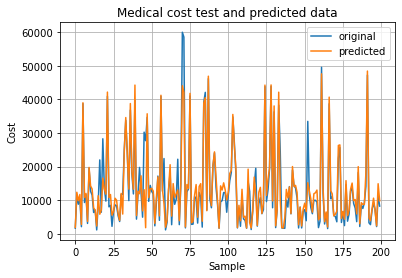

In [27]:
from sklearn.ensemble import RandomForestRegressor
RandomForest=RandomForestRegressor(random_state=1,n_estimators=30,criterion='squared_error',max_depth=10,min_samples_leaf=4).fit(x_train,y_train)
print(RandomForest)
y_pred=RandomForest.predict(x_test)
MPredicts['RandomForestRegressor']=y_pred
RegressionMetrics['RandomForestRegressor'][0]=(mean_absolute_percentage_error(y_pred, y_test)*100)
RegressionMetrics['RandomForestRegressor'][1]=r2_score(y_pred, y_test)
print('Mean absolute percentage error: {:.3f}'.format(RegressionMetrics['RandomForestRegressor'][0]))
print('Coefficient of determination: {:.3f}'.format(RegressionMetrics['RandomForestRegressor'][1]))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Medical cost test and predicted data")
plt.xlabel('Sample')
plt.ylabel('Cost')
plt.legend(loc='best',fancybox=True, shadow=False)
plt.grid(True)
plt.show()  

4)Neural Network

In [95]:
#Pytorch libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
#Device
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(f'Using: {device}')

Using: cpu


In [30]:
#Data management in pytorch
from torch.utils.data import Dataset, DataLoader
class CustomDataset(Dataset): #Customized data
    def __init__(self,inputs,labels):
        # Initialize data, download, etc.
        assert inputs.shape[0] == labels.shape[0], 'Error number of samples'
        self.X=torch.FloatTensor(inputs).to(device)
        self.Y=torch.FloatTensor(labels).to(device)

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.X[index], self.Y[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.X.shape[0]

In [31]:
Train_dataset=CustomDataset(x_train,y_train) #Train data into customdataset
Test_dataset=CustomDataset(x_test,y_test) #Test data into customdataset
mbsize=16 #Mini batch size

In [32]:
#Dataloader provide a iterable object and and generate the mini-batches
train_loader = DataLoader(dataset=Train_dataset,
                          batch_size=mbsize,
                          shuffle=True)
                          
test_loader = DataLoader(dataset=Test_dataset,
#                        batch_size=mbsize,
                          shuffle=False)

In [33]:
#Neural network structure
class RegressorNN(nn.Module):
    def __init__(self, input_features = 6 , out_features = 1): #Initialization, Constructor inside class RegressorNN
        super(RegressorNN,self).__init__()    #Inherits the nn.Module
        # Network architecture
        self.fully_connected_layer1 = nn.Linear(input_features, 75)
        self.fully_connected_layer2 = nn.Linear(75,50)
        self.fully_connected_layer3 = nn.Linear(50,25)
        self.fully_connected_layer4 = nn.Linear(25,10)
        self.output_layer = nn.Linear(10, out_features)
    def forward(self,x):          #Forward Propagation function inside class RegressorNN
        x = F.relu(self.fully_connected_layer1(x))
        x = F.relu(self.fully_connected_layer2(x))
        x = F.relu(self.fully_connected_layer3(x))
        x = F.relu(self.fully_connected_layer4(x))
        x = (self.output_layer(x))
        return(x)

In [34]:
#Model train function
def Train_loop(model,trainloader,num_epochs,optimizer,loss_function):
    losses=[] #List to store losses values
    loss=0;
    epochs=range(num_epochs)
    model.train() #Model train mode
    for epoch in range(num_epochs): #Iterating over num epoch
        for i,(xi,yi) in enumerate(trainloader): #Iterating over mini batch
            #Forward pass
            y_pred=model.forward(xi) 
            #Loss
            yi=yi.reshape((yi.shape[0], 1))#Reshaping
            loss=loss_function(y_pred,yi)
            #Backward propagation
            optimizer.zero_grad() #Reset gradients to zero to avoid accumulation
            loss.backward()
            optimizer.step()
        losses.append(loss.item())#Add loss value each epoch         
            
    return epochs,losses 

In [35]:
#Prediction values function
def prediction_loop(model,testdataset):
    predictions = [] #List to store predictions 
    labels=[] #List to store correct labels (diabetes or not)
    model.eval() #Evaluation mode
    with torch.no_grad(): #Dissable gradients calculations
        for i,(xi,yi) in enumerate(testdataset): #Iteration over values
            #Forward pass
            #print(xi,yi)
            y_pred = model.forward(xi) 
            #print(y_pred)
            predictions.append(y_pred.item()) #Which index is maximum using .argmax(); 0 or 1.
            labels.append(yi.item())
    return (labels,predictions)

In [98]:
torch.cuda.empty_cache()
torch.manual_seed(10) #Set seed
loss_function= nn.L1Loss() 
model=RegressorNN()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)  
num_epochs=300
_,_=Train_loop(model,train_loader,num_epochs,optimizer,loss_function)

Mean absolute percentage error: 25.588
Coefficient of determination: 0.872


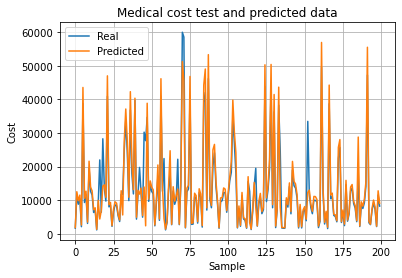

In [37]:
y_test,y_pred=prediction_loop(model,test_loader) #Predicting values in training network
#Compute metrics, add it to dictiany and plot results
MPredicts['NeuralNetwork']=y_pred
RegressionMetrics['NeuralNetwork'][0]=(mean_absolute_percentage_error(y_pred, y_test)*100)
RegressionMetrics['NeuralNetwork'][1]=r2_score(y_pred, y_test)
print('Mean absolute percentage error: {:.3f}'.format(RegressionMetrics['NeuralNetwork'][0]))
print('Coefficient of determination: {:.3f}'.format(RegressionMetrics['NeuralNetwork'][1]))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Real")
plt.plot(x_ax, y_pred, label="Predicted")
plt.title("Medical cost test and predicted data")
plt.xlabel('Sample')
plt.ylabel('Cost')
plt.legend(loc='best',fancybox=True, shadow=False)
plt.grid(True)
plt.show()  

RESULTS AND ANALYSIS

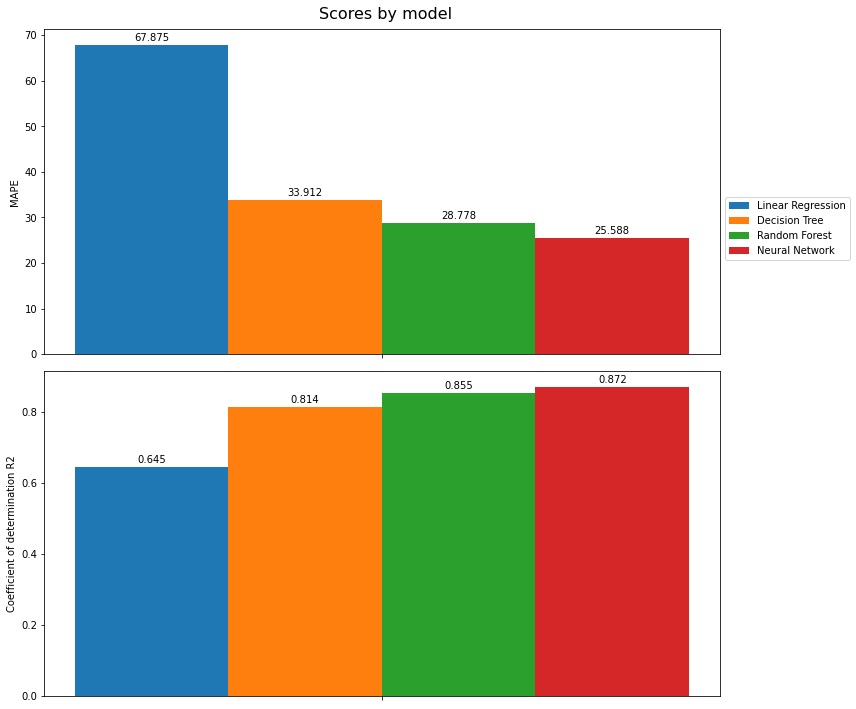

In [99]:
#Plotting metrics results for each model
labels = [None]
x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(2,figsize=(12,10))
fig.suptitle('Scores by model', fontsize=16,x=0.45)
#Bar plots
rects1 = ax[0].bar(x - width, np.round(RegressionMetrics['MLinearRegression'][0],3), width, label='Linear Regression')
rects2 = ax[0].bar(x , np.round(RegressionMetrics['DecisionTreeRegressor'][0],3), width, label='Decision Tree')
rects3 = ax[0].bar(x + width, np.round(RegressionMetrics['RandomForestRegressor'][0],3), width, label='Random Forest')
rects4 = ax[0].bar(x + 2*width, np.round(RegressionMetrics['NeuralNetwork'][0],3), width, label='Neural Network')

#Custom plots
ax[0].set_ylabel('MAPE')
ax[0].set_xticks(x+width/2,labels)
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 0.5))

ax[0].bar_label(rects1, padding=2)
ax[0].bar_label(rects2, padding=2)
ax[0].bar_label(rects3, padding=2)
ax[0].bar_label(rects4, padding=2)

#Bar plots
rects1 = ax[1].bar(x - width,np.round(RegressionMetrics['MLinearRegression'][1],3), width, label='Linear Regression')
rects2 = ax[1].bar(x , np.round(RegressionMetrics['DecisionTreeRegressor'][1],3), width, label='Decision Tree')
rects3 = ax[1].bar(x + width, np.round(RegressionMetrics['RandomForestRegressor'][1],3), width, label='Random Forest')
rects4 = ax[1].bar(x + 2*width, np.round(RegressionMetrics['NeuralNetwork'][1],3), width, label='Neural Network')

#Custom plots
ax[1].set_ylabel('Coefficient of determination R2')
ax[1].set_xticks(x+width/2,labels)

ax[1].bar_label(rects1, padding=2)
ax[1].bar_label(rects2, padding=2)
ax[1].bar_label(rects3, padding=2)
ax[1].bar_label(rects4, padding=2)


fig.tight_layout()
plt.show()

Models from best to worst is the neural network, random forest, decision tree and linear regression. From the MAPE it is clear that the neural network presents a lower dispersion of the predictions with respect to the real data and by means of the R2 coefficient it is shown that it is the one that best fits the curve to be predicted.

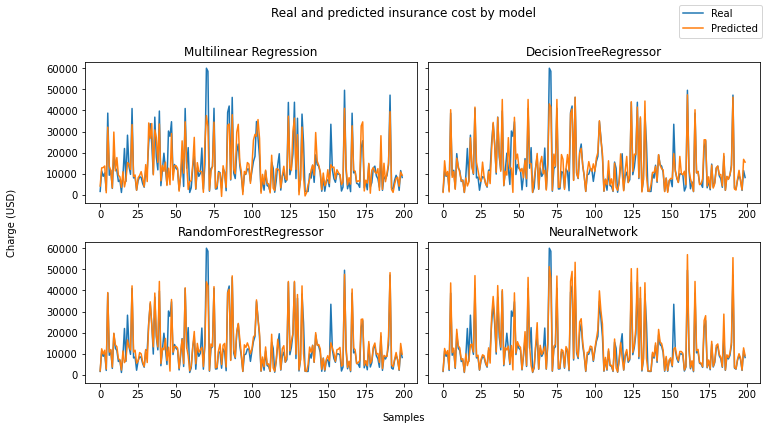

In [100]:
#Plotting real charge values and predictions values by each model
fig, axs = plt.subplots(2,2,figsize=(10,5),constrained_layout = True,sharey=True)
fig.suptitle('Real and predicted insurance cost by model',y=1.1)
#plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
x_ax = range(len(y_test))
axs[0,0].plot(x_ax, y_test)
axs[0,0].plot(x_ax, MPredicts['MLinearRegression'])
axs[0,0].set_title('Multilinear Regression')
axs[0,1].plot(x_ax, y_test)
axs[0,1].plot(x_ax, MPredicts['DecisionTreeRegressor'])
axs[0,1].set_title('DecisionTreeRegressor')
axs[1,0].plot(x_ax, y_test)
axs[1,0].plot(x_ax, MPredicts['RandomForestRegressor'])
axs[1,0].set_title('RandomForestRegressor')
axs[1,1].plot(x_ax, y_test)
axs[1,1].plot(x_ax, MPredicts['NeuralNetwork'])
axs[1,1].set_title('NeuralNetwork');
# Create the legend
fig.legend(labels=['Real','Predicted'],   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=0.5,    # Small spacing around legend box
           #title="Curves"  # Title for the legend
           );
fig.text(0.5,-0.05,"Samples", ha="center")
fig.text(-0.05, 0.5, 'Charge (USD)', va='center', rotation='vertical');

It can be seen that the order from best to worst model mentioned above is correct. In addition, it is observed that in all the models there are approximately 4 critical peaks, that is, those that the models predict in the worst way, these peaks are approximately between 20-25, 60 -70 and 160-170 and may be due to the fact that they are very atypical costs.

CONCLUSION

*The model that best describes the data is the neural network, however it is not a very significant improvement compared to the second best model, that is, the random forest, although the latter has a somewhat lower computational cost, the same happens with the latter with respect to the tree. of decision. For its part, the linear regression had a very low performance, this is due to the simplicity of this algorithm, which is reflected in the fact that it is not computationally expensive.

*Probably one of the limitations to the accuracy of the models is that there is little data that must also be divided into training and testing.
In addition to those used above, there are other ML algorithms for regression that could be experimented with if they produce better results.